# **Project Name**    -  **ONLINE RETAIL CLUSTERING**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Project Summary -**

The dataset contains 541,909 transactions from an online retail store between 2010 and 2011. It records various sales transactions, including information about the products sold, their descriptions, prices, quantities, and customer details. The data is particularly useful for analyzing customer purchasing behavior, identifying sales trends, and developing strategies for business growth. With this dataset, exploratory data analysis (EDA) and customer segmentation techniques can be applied to drive actionable insights.

<u> Data pre-processing </u>

For train the model we use description column and country column. We performed Text cleaning as our next step. Convert all words in lowercase. We performed Stemming as our next step. We remove all stopwords.Also use stemming function. We performed TF-IDF vectorizer.Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. Applying PCA-Principal Component Analysis to reduce dimensions. We will use 3000 components.

<u> Applying models </u>

WE use Elbow method for finding k values. Also use Silhouette Score for best score. Also use Dendogram for finding the value of clusters. Use Agglomerative Clustering. Use KMeans Clustering. here are few clusters with there word cloud graph.


# **Problem Statement**

The goal is to analyze the online retail dataset to understand customer purchasing patterns, identify the most popular products, and develop customer segmentation strategies using techniques like RFM (Recency, Frequency, Monetary) analysis. This will help improve customer targeting, enhance marketing strategies, and optimize inventory management.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what quantity and price is available in different countries

3. Identifying the most popular product in recent years.
4. Clustering similar content by matching text-based features



# ***Let's Begin !***

## ***1. Know Your Data***

**Variables Information**

1. InvoiceNo: Unique identifier for each transaction (categorical).

2. StockCode: Unique product code for each item (categorical).

3. Description: Detailed description of the product (text, has missing values).

4. Quantity: Number of units purchased per transaction (integer, can include negative values for returns).

5. InvoiceDate: Timestamp for when the transaction occurred (datetime).

6. UnitPrice: Price of a single unit of the product (float).

7. CustomerID: Unique identifier for each customer (float, has missing values)

8. Country: Country of residence of the customer (categorical).



### Import Libraries

In [2]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 6.8 MB/s eta 0:00:00


In [3]:
# import the dependancy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import difflib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [4]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of Online Retail.xlsx - Online Retail.csv')

In [5]:
# Randomly sample 2 lakh rows and reassign to the original DataFrame
df = data.sample(n=100000, random_state=42).reset_index(drop=True)

### Dataset First View

In [ ]:
# print first five rows
df.head()

InvoiceNo StockCode                       Description  Quantity  \
0    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
1    554974     21128                GOLD FISHING GNOME         4   
2    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
3    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
4    546157     22180                    RETROSPOT LAMP         2   

      InvoiceDate  UnitPrice  CustomerID         Country  
0    6/1/11 12:05       0.85     17315.0  United Kingdom  
1   5/27/11 17:14       6.95     14031.0  United Kingdom  
2   4/21/11 17:05       0.65     14031.0  United Kingdom  
3  11/16/11 10:39       1.95     17198.0  United Kingdom  
4    3/10/11 8:40       9.95     13502.0  United Kingdom

In [ ]:
# print last five rows
df.tail()

InvoiceNo StockCode                       Description  Quantity  \
99995   C558313     22629               SPACEBOY LUNCH BOX         -1   
99996    574074    90186B  CRYSTAL HOOP EARRING FLORAL LEAF         1   
99997    560929     21094     SET/6 RED SPOTTY PAPER PLATES         2   
99998    573585     22467                 GUMBALL COAT RACK         4   
99999    562347     22998      TRAVEL CARD WALLET KEEP CALM         4   

          InvoiceDate  UnitPrice  CustomerID         Country  
99995   6/28/11 11:31       1.95     13870.0  United Kingdom  
99996   11/2/11 15:33       2.90         NaN  United Kingdom  
99997   7/22/11 10:06       0.85     16866.0  United Kingdom  
99998  10/31/11 14:41       4.96         NaN  United Kingdom  
99999    8/4/11 12:22       0.42     13263.0  United Kingdom

### Dataset Rows & Columns count

In [ ]:
# Check the shape of the dataset
df.shape

(100000, 8)

### Data describe

In [ ]:
#To check distribution describing dataset
df.describe(include='all')

InvoiceNo StockCode                         Description       Quantity  \
count     100000    100000                               99723  100000.000000   
unique     17962      3610                                3697            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq         221       433                                 441            NaN   
mean         NaN       NaN                                 NaN       9.413390   
std          NaN       NaN                                 NaN     351.904849   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   74215.000000   

           InvoiceDate      UnitPrice    CustomerID         Country  
count           100000  100000.000000  74983.000000          100000  
unique           16754            NaN           NaN              38  
top     10/31/11 14:41            NaN           NaN  United Kingdom  
freq               221            NaN           NaN           91262  
mean               NaN       4.464044  15285.249870             NaN  
std                NaN      86.567489   1715.869301             NaN  
min                NaN  -11062.060000  12346.000000             NaN  
25%                NaN       1.250000  13952.000000             NaN  
50%                NaN       2.080000  15142.000000             NaN  
75%                NaN       4.130000  16795.000000             NaN  
max                NaN   13541.330000  18287.000000             NaN

### Dataset Information

In [ ]:
# print the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    100000 non-null  object 
 1   StockCode    100000 non-null  object 
 2   Description  99723 non-null   object 
 3   Quantity     100000 non-null  int64  
 4   InvoiceDate  100000 non-null  object 
 5   UnitPrice    100000 non-null  float64
 6   CustomerID   74983 non-null   float64
 7   Country      100000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


* We have **100000** **rows** and **8** **columns** provided in the data.

* In the dataset we have **5 objects** , **2 floats** and **1 integer** column as **Quantity**.

## **2. Data Wrangling**

#### Missing Values/Null Values

In [ ]:
# Check for null values %.
for col in data.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'The null values in {col} column are  {df[col].isnull().sum()} Percentage:- {null_rate}%')

The null values in Description column are  277 Percentage:- 0.27699999999999997%
The null values in CustomerID column are  25017 Percentage:- 25.017%


<Axes: >

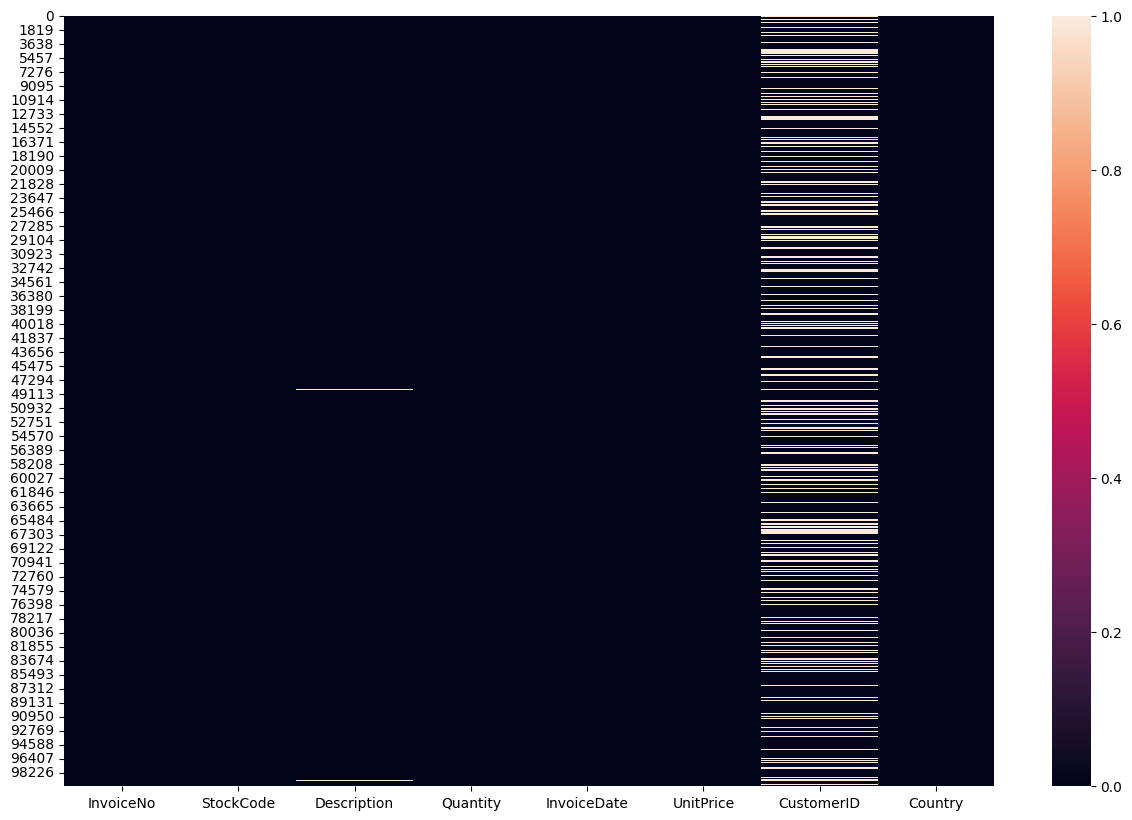

In [ ]:
# let's visualizing  the null values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

#### Null value treatment

In [ ]:
#Replacing null values in 'director' column with 'unknown'
df['Description'].replace(np.nan, "unknown",inplace  = True)

#Replacing null values in 'rating' column with 'Mode'
df['CustomerID']= df['CustomerID'].fillna(df['CustomerID'].mode()[0])


<ipython-input-8-ce544dc07ae0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].replace(np.nan, "unknown",inplace  = True)


In [ ]:
#Check null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Duplicate Values

In [ ]:
df.duplicated().sum()

200

### What did you know about your dataset?

**1- Data Overview**
  * We have **100000** **rows** and **8** **columns** provided in the data.

  * In the dataset we have **5 objects** , **2 floats** and **1 integer** column as **Quantity**.

**2- Checking the null values**
  * We have **277** null values in **Description** column.
  * We also have **25017** null values in **CustomerID** column.

**3- Check Duplicate values in the dataset**

  * We have 200 Duplicate values in the dataset.

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Analysis 'Country' column**

In [ ]:
country_data = df['Country'].value_counts()
country_data

Country
United Kingdom          91262
Germany                  1810
France                   1595
EIRE                     1580
Netherlands               470
Spain                     465
Belgium                   373
Switzerland               347
Portugal                  313
Australia                 240
Norway                    199
Italy                     151
Channel Islands           144
Finland                   115
Cyprus                    111
Sweden                     89
Unspecified                83
Austria                    72
USA                        68
Japan                      64
Denmark                    63
Poland                     61
Israel                     58
Hong Kong                  48
Singapore                  35
Greece                     33
Iceland                    27
Canada                     26
Malta                      20
European Community         15
United Arab Emirates       15
RSA                        14
Lebanon                     9
Lithuania                   8
Bahrain                     5
Czech Republic              5
Brazil                      4
Saudi Arabia                3
Name: count, dtype: int64

In [ ]:
country_df = df['Country']

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# 1. Sales distribution by country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

In [ ]:
# 2. Top-selling products
top_products = (
    df.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [ ]:
from datetime import datetime

# Extract month from InvoiceDate using datetime
df['Month'] = df['InvoiceDate'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%y %M:%S').month)


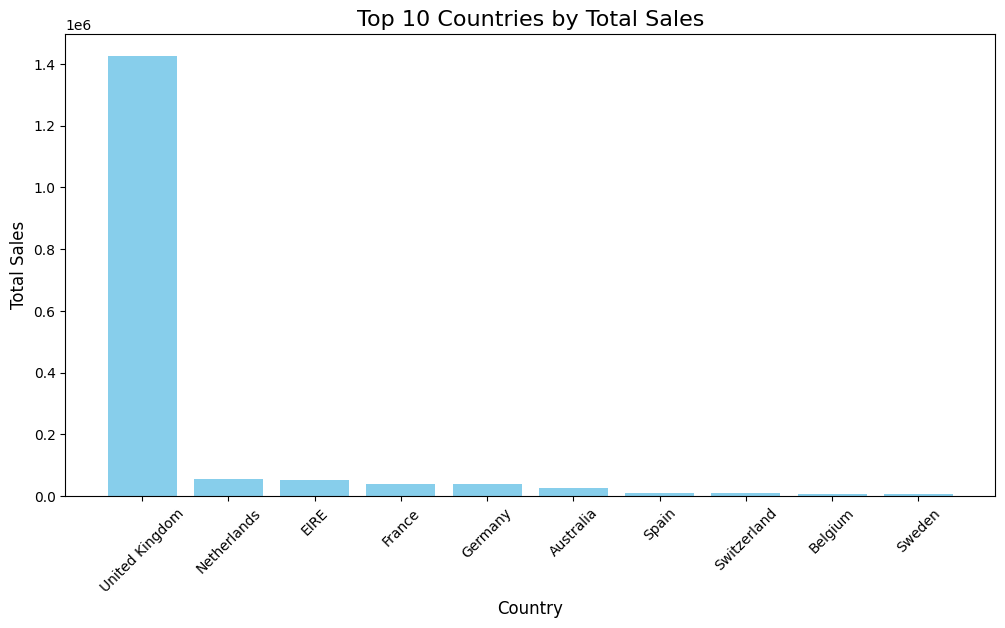

In [ ]:
# Top 10 Countries by Total Sales

plt.figure(figsize=(12, 6))
plt.bar(country_sales[:10].index, country_sales[:10].values, color='skyblue')
plt.title('Top 10 Countries by Total Sales', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

- United Kingdom is the Top country having more than **91.2%** sales as compare to other countries sales

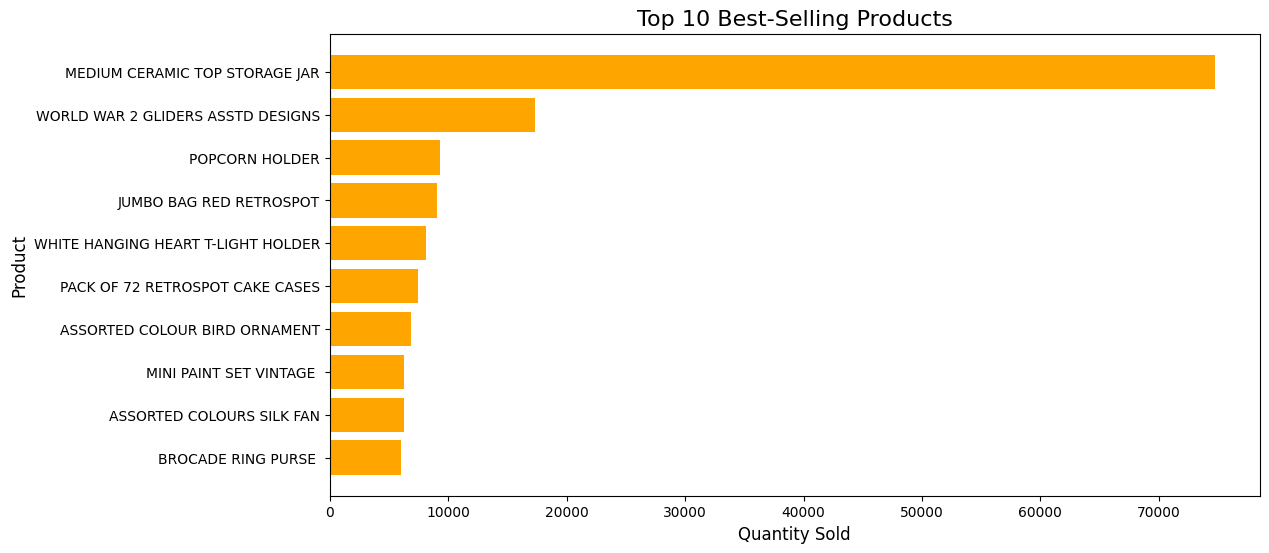

In [ ]:
# Top 10 Best-Selling Products

plt.figure(figsize=(12, 6))
plt.barh(top_products.index, top_products.values, color='orange')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

- MEDIUM STORAGE TOP SELLING JAR is the top selling product

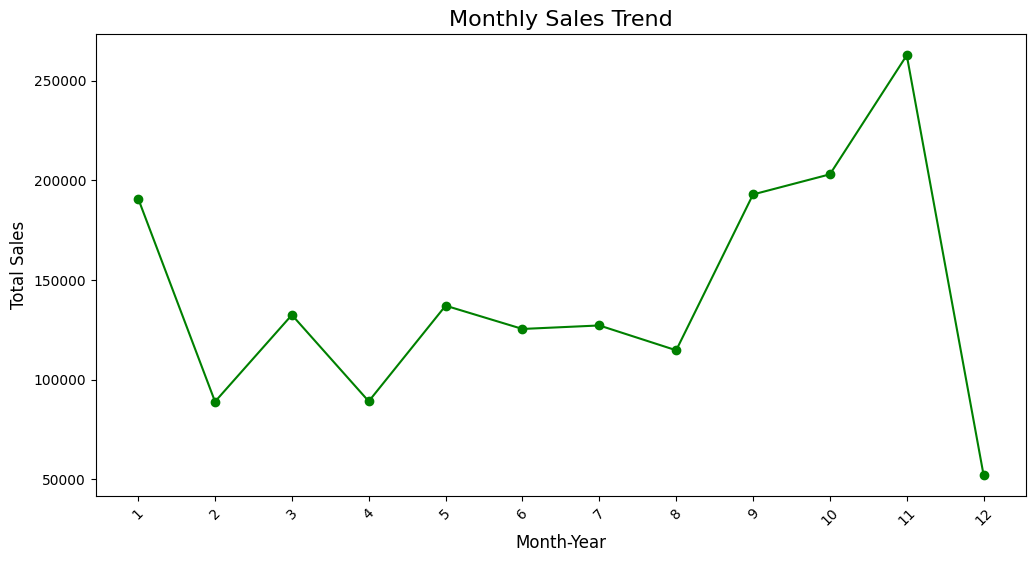

In [ ]:
# Monthly sales trends

monthly_sales = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='green')
plt.title('Monthly Sales Trend', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Month-Year', fontsize=12)
plt.xticks(rotation=45)
plt.show()

- **November** month having the most number of sales while **December** month having the least number of sales

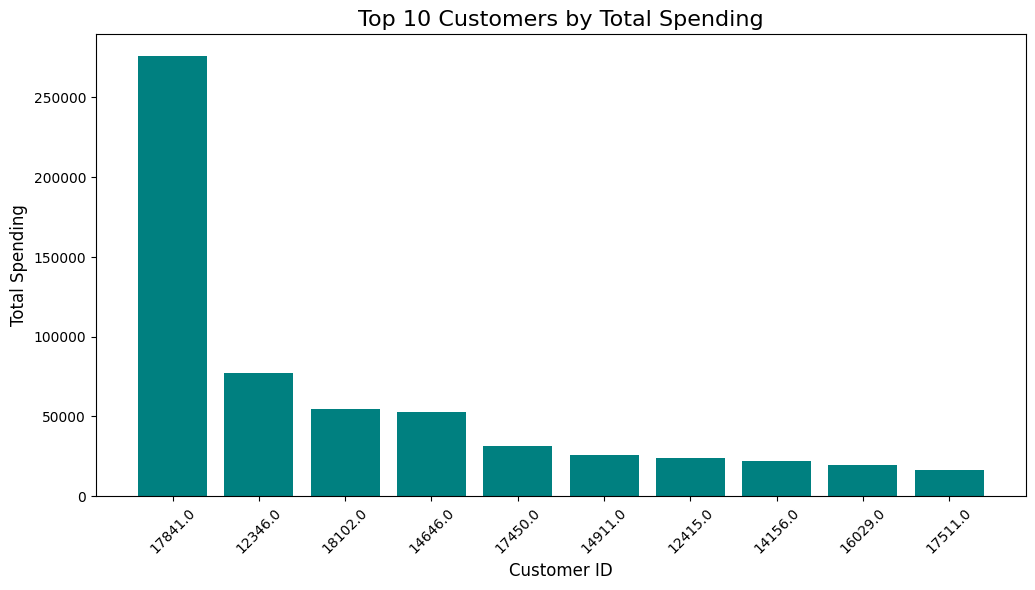

In [ ]:
#Customer Lifetime Value
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_customers.index.astype(str), top_customers.values, color='teal')
plt.title('Top 10 Customers by Total Spending', fontsize=16)
plt.ylabel('Total Spending', fontsize=12)
plt.xlabel('Customer ID', fontsize=12)
plt.xticks(rotation=45)
plt.show()

- **17841 Customer ID** having the most Total spending across all customers in a year.

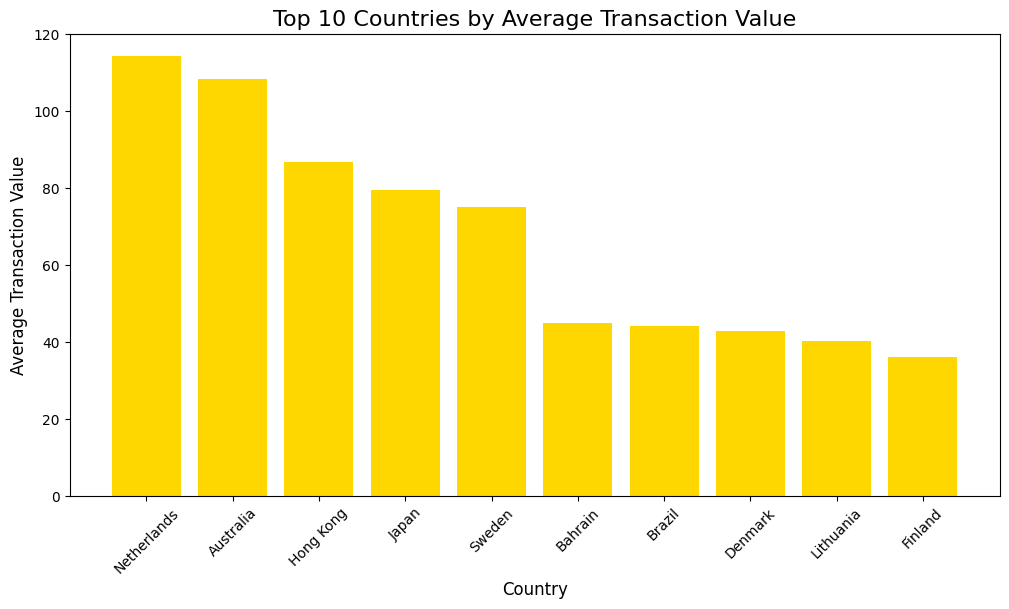

In [ ]:
# Country-Wise Average Spending
avg_spending = df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(avg_spending.index, avg_spending.values, color='gold')
plt.title('Top 10 Countries by Average Transaction Value', fontsize=16)
plt.ylabel('Average Transaction Value', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.show()

- Netherland and Australia among the top Average Transactions Value (ATV) having more than **100** ATV

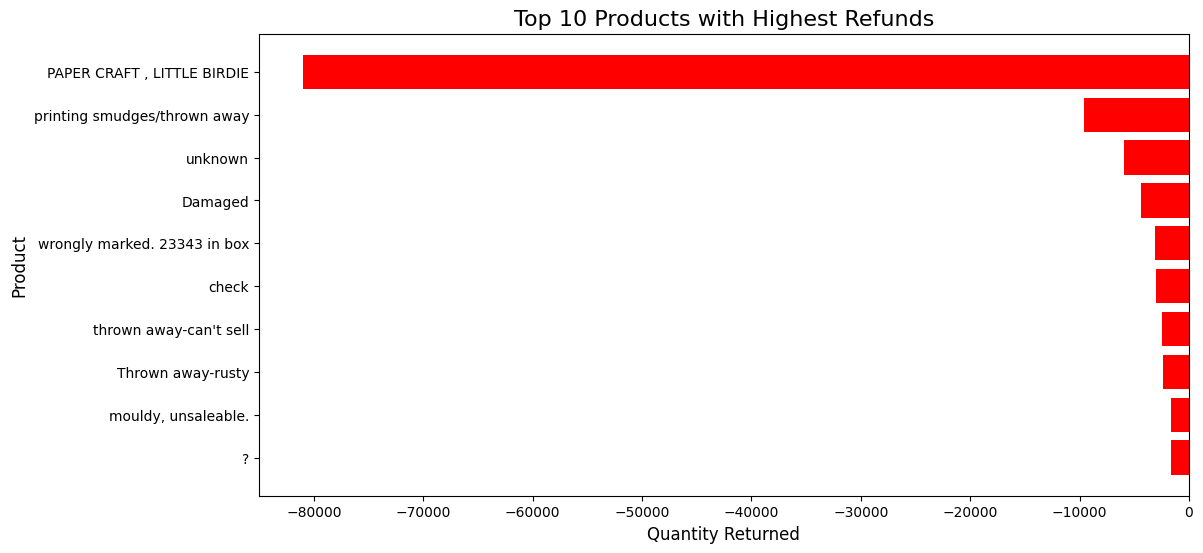

In [ ]:
# Refund and Returns Analysis
refunds = df[df['Quantity'] < 0]
refund_products = refunds.groupby('Description')['Quantity'].sum().sort_values().head(10)

plt.figure(figsize=(12, 6))
plt.barh(refund_products.index, refund_products.values, color='red')
plt.title('Top 10 Products with Highest Refunds', fontsize=16)
plt.xlabel('Quantity Returned', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

- PAPER CRAFT , LITTLE BIRDIE product having the huge number of returned and refunds

### **Analysis on 'Description' column:-**
**So we create wordcloud for description column**

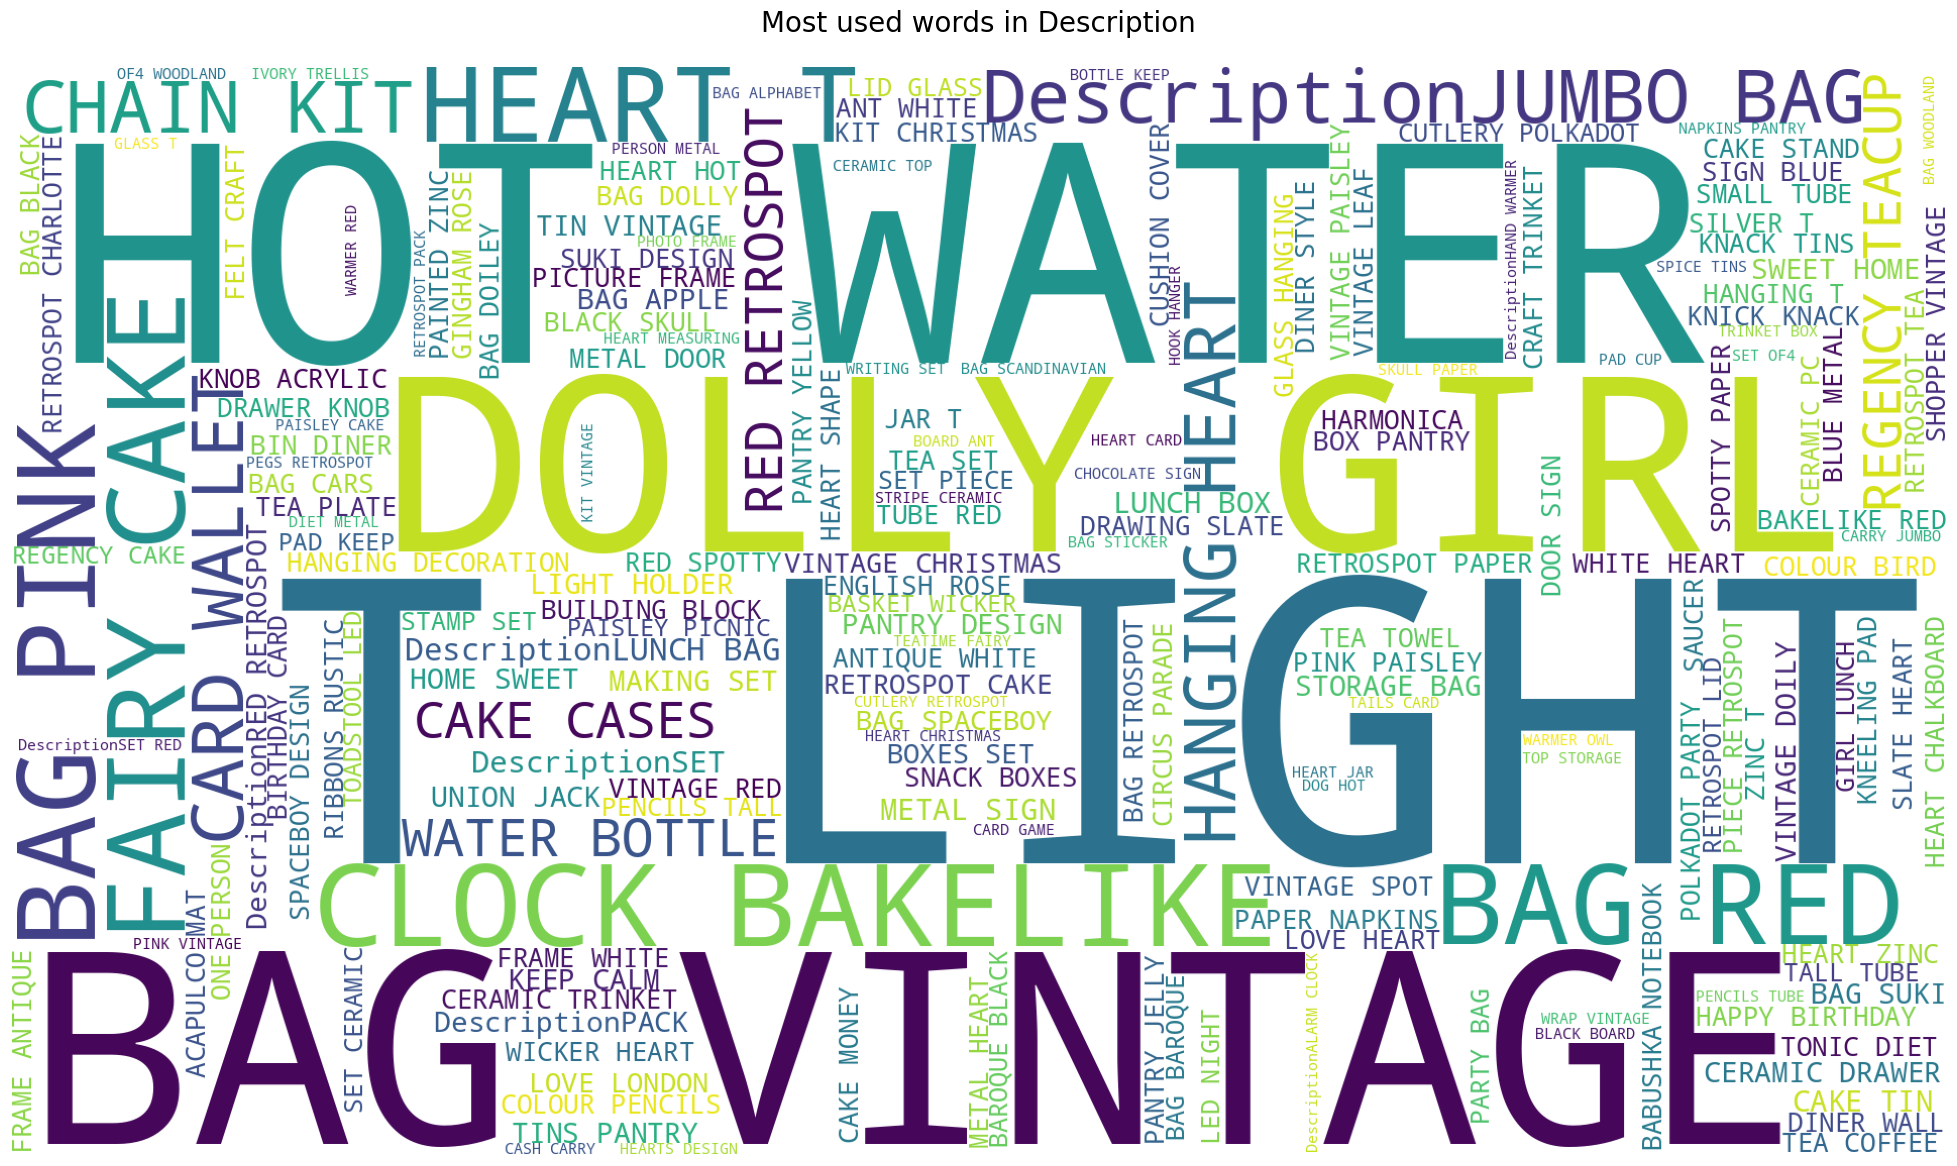

In [ ]:
plt.subplots(figsize=(25,15))
# parameters for wordcloud
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate("Description".join(df.Description))
# Plot the image
plt.title('Most used words in Description', fontsize = 20, pad=25)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Retail.png')
plt.show()

**'Description' column**
  * Most repeated words in description column are Bag, Vintage, T Light, Hot Water and Dolly Girl.

## ***4. Feature Engineering & Data Pre-processing***

### **Feature Engineering**

We will add all text based or categorical columns

In [6]:
df['text_info'] = df['Description']+ ' ' + df['Country']

In [7]:
# Checking
df['text_info'][0]

'HANGING JAM JAR T-LIGHT HOLDER United Kingdom'

###  **Text cleaning**

In [8]:
#text cleaning function
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [9]:
# Applying above function on our combined column
df['text_info'] = df['text_info'].apply(clean_text)

In [10]:
# we will convert all words in lowercase
df['text_info'] = df['text_info'].str.lower()

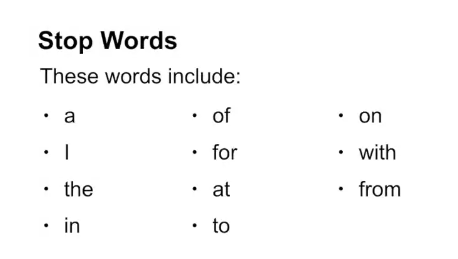

In [11]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### **Stemming-**

In [12]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [13]:
# defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered

df['cleaned_text']= ''
for item, row in df.iterrows():
  df.at[item,'cleaned_text'] = filter_words(row['text_info'],stop_words)

df['cleaned_text']



0          [hang, jam, jar, tlight, holder, unit, kingdom]
1                       [gold, fish, gnome, unit, kingdom]
2            [set, red, spotti, paper, cup, unit, kingdom]
3           [pack, box, christma, panetton, unit, kingdom]
4                         [retrospot, lamp, unit, kingdom]
                               ...                        
99995                [spaceboy, lunch, box, unit, kingdom]
99996    [crystal, hoop, earring, floral, leaf, unit, k...
99997      [set, red, spotti, paper, plate, unit, kingdom]
99998                  [gumbal, coat, rack, unit, kingdom]
99999    [travel, card, wallet, keep, calm, unit, kingdom]
Name: cleaned_text, Length: 100000, dtype: object

In [14]:
#join words function
def join_words(x):
  return " ".join(x)

In [15]:
#final column
df['cleaned_text'] = df['cleaned_text'].apply(join_words)

In [16]:
words = df.cleaned_text
words

0              hang jam jar tlight holder unit kingdom
1                         gold fish gnome unit kingdom
2                set red spotti paper cup unit kingdom
3              pack box christma panetton unit kingdom
4                          retrospot lamp unit kingdom
                             ...                      
99995                  spaceboy lunch box unit kingdom
99996    crystal hoop earring floral leaf unit kingdom
99997          set red spotti paper plate unit kingdom
99998                    gumbal coat rack unit kingdom
99999        travel card wallet keep calm unit kingdom
Name: cleaned_text, Length: 100000, dtype: object

### **using TF-IDF**
Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

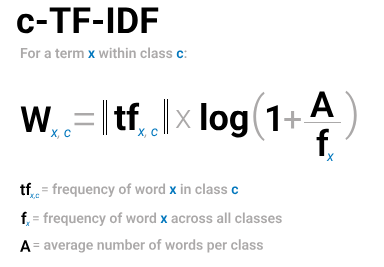

In [17]:
#using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X = t_vectorizer.fit_transform(words)

In [18]:
X

<100000x1821 sparse matrix of type '<class 'numpy.float64'>'
	with 404558 stored elements in Compressed Sparse Row format>

### **Applying PCA-Principal Component Analysis to reduce dimensions.**

In [ ]:
# PCA Code
from sklearn.decomposition import PCA
transformer = PCA()
transformer.fit(X.toarray())

PCA()

### **Cumulative Explained Variance**

Text(0, 0.5, 'cumulative explained variance')

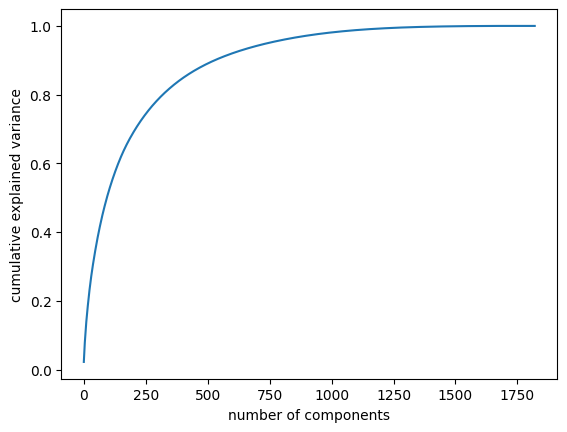

In [ ]:
 #explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

**We will use 250 components**

In [19]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 250
from sklearn.decomposition import PCA
transformer = PCA(n_components=250)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

(100000, 250)

In [20]:
# vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)

In [21]:
#applying pca
X= transformer.transform(X_vectorized.toarray())

In [22]:
X

array([[-1.87068190e-01,  3.85142164e-01,  1.08320265e-01, ...,
         1.47366345e-02,  2.12571171e-02, -8.18094366e-03],
       [-3.96478321e-02, -1.29229041e-02, -2.22940416e-02, ...,
         3.85522436e-02,  7.22256257e-03,  2.57789553e-02],
       [ 3.13026428e-02, -1.73354567e-01,  2.62847397e-01, ...,
         1.54311682e-02, -2.35515940e-02, -8.10802973e-03],
       ...,
       [ 3.41849268e-02, -1.74802148e-01,  2.65117905e-01, ...,
        -5.74920808e-03, -2.74723477e-02,  2.56239552e-03],
       [-4.30078072e-02, -1.57823944e-02, -2.51963715e-02, ...,
        -3.28421355e-03,  1.66226027e-03,  9.73937708e-03],
       [-6.13920249e-02, -2.59736324e-02, -4.49194340e-02, ...,
         1.59923558e-02,  4.08391948e-03,  2.81123829e-04]])

## ***5. Cluster Model Implementation***

### **Silhouette Score Elbow for KMeans Clustering**

In [23]:
!pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 4.4 MB/s eta 0:00:00


In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


# Initiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

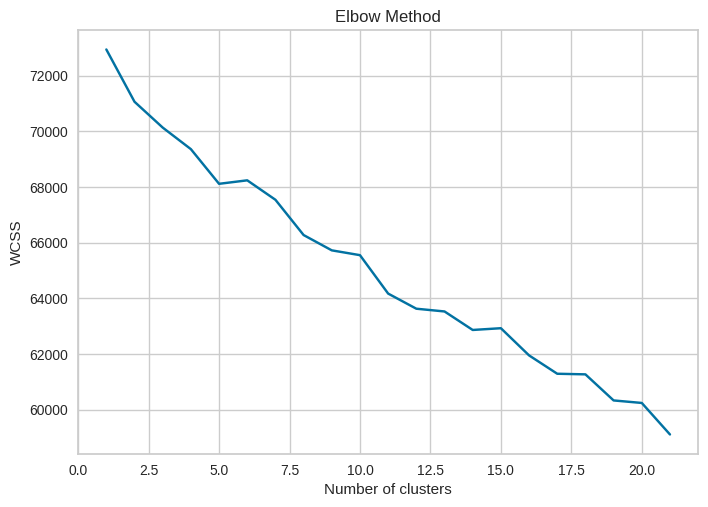

In [ ]:
# We will plot the graph to get the no. of clusters
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* **We will take no. of clusters as 15**

### **Dendogram**

In [ ]:
# Plot the dendogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))

dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#check for largest distance vertically without crossing any horizontal line

### **Agglomerative Clustering**

In [ ]:
# Let's  Import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 15, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

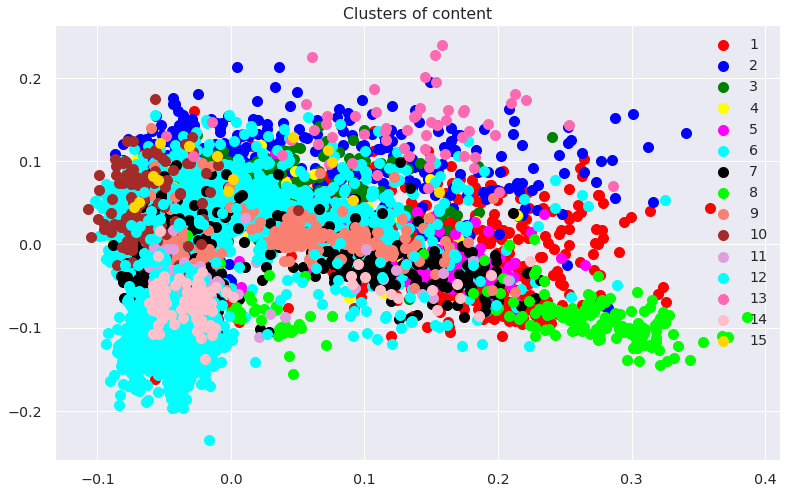

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = '4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = '5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'cyan', label = '6')
plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'black', label = '7')
plt.scatter(X[y_hc == 7, 0], X[y_hc == 7, 1], s = 100, c = 'lime', label = '8')
plt.scatter(X[y_hc == 8, 0], X[y_hc == 8, 1], s = 100, c = 'salmon', label = '9')
plt.scatter(X[y_hc == 9, 0], X[y_hc == 9, 1], s = 100, c = 'brown', label = '10')
plt.scatter(X[y_hc == 10, 0], X[y_hc == 10, 1], s = 100, c = 'plum', label = '11')
plt.scatter(X[y_hc == 11, 0], X[y_hc == 11, 1], s = 100, c = 'aqua', label = '12')
plt.scatter(X[y_hc == 12, 0], X[y_hc == 12, 1], s = 100, c = 'hotpink', label = '13')
plt.scatter(X[y_hc == 13, 0], X[y_hc == 13, 1], s = 100, c = 'pink', label = '14')
plt.scatter(X[y_hc == 14, 0], X[y_hc == 14, 1], s = 100, c = 'gold', label = '15')

plt.title('Clusters of content')

plt.legend()
plt.show()

In [ ]:
# Check Silhouette Score for each cluster
from sklearn.cluster import AgglomerativeClustering
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    #centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.06459993443057757
For n_clusters = 3, silhouette score is 0.05382703904209711


### **KMeans Clustering**

#### **Model fitting**

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

**calculating silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient:  0.052


**Predicting**

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

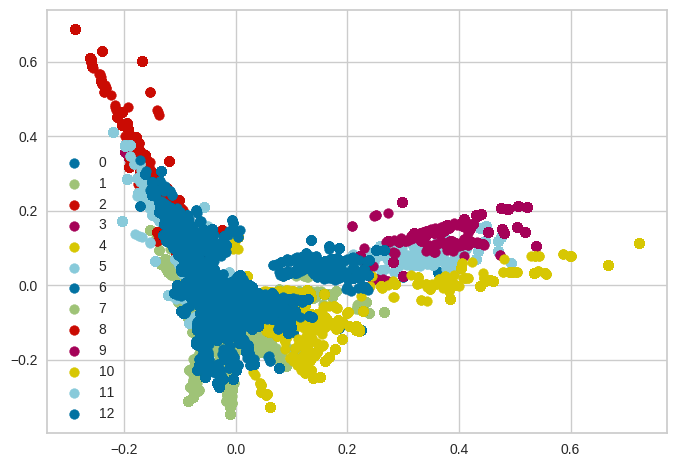

In [ ]:
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

**we now assign our clusters in our dataset by creating a new column "clusters"**

In [ ]:
# Assigning clusters to our data
df['clusters'] = kmeans.labels_

In [ ]:
# checking how it is working
df.head(2)

InvoiceNo StockCode                     Description  Quantity  \
0    555200     71459  HANGING JAM JAR T-LIGHT HOLDER        24   
1    554974     21128              GOLD FISHING GNOME         4   

     InvoiceDate  UnitPrice  CustomerID         Country  \
0   6/1/11 12:05       0.85     17315.0  United Kingdom   
1  5/27/11 17:14       6.95     14031.0  United Kingdom   

                                      text_info  \
0  hanging jam jar tlight holder united kingdom   
1             gold fishing gnome united kingdom   

                              cleaned_text  clusters  
0  hang jam jar tlight holder unit kingdom         8  
1             gold fish gnome unit kingdom        12

### **Evaluation Metrics**

#### **Silhouette Score -**

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.0040541527725876025
For n_clusters = 3 The average silhouette_score is : 0.005247972688512849
For n_clusters = 4 The average silhouette_score is : 0.00648698722923013
For n_clusters = 5 The average silhouette_score is : 0.004848839280493702
For n_clusters = 6 The average silhouette_score is : 0.0019530792525686005
For n_clusters = 7 The average silhouette_score is : 0.0025802927021688943
For n_clusters = 8 The average silhouette_score is : 0.003496267109733175
For n_clusters = 9 The average silhouette_score is : 0.004558257282723737
For n_clusters = 10 The average silhouette_score is : 0.0049782088396676935
For n_clusters = 11 The average silhouette_score is : 0.005911217146836388
For n_clusters = 12 The average silhouette_score is : 0.006044426290847434
For n_clusters = 13 The average silhouette_score is : 0.006381449880707573
For n_clusters = 14 The average silhouette_score is : 0.005620890277964598
For n_clusters = 15 The averag

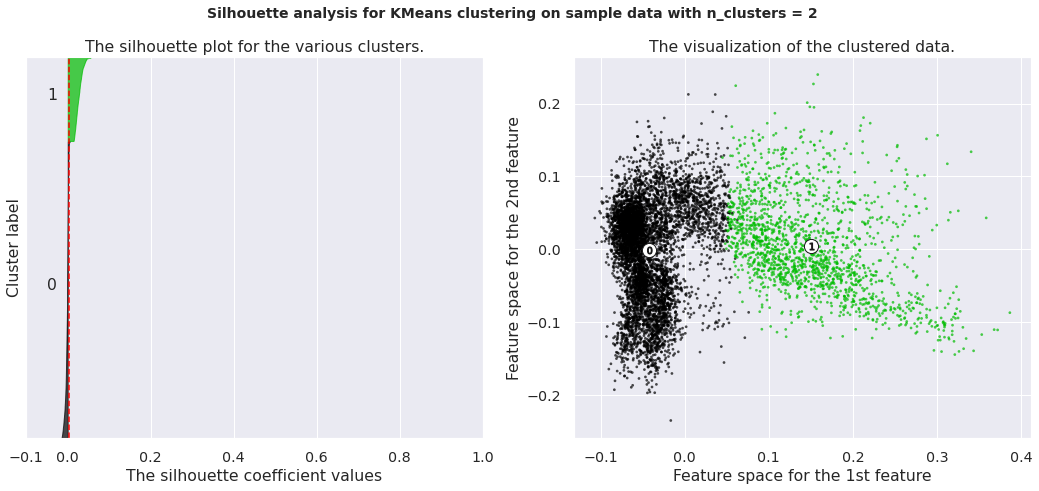

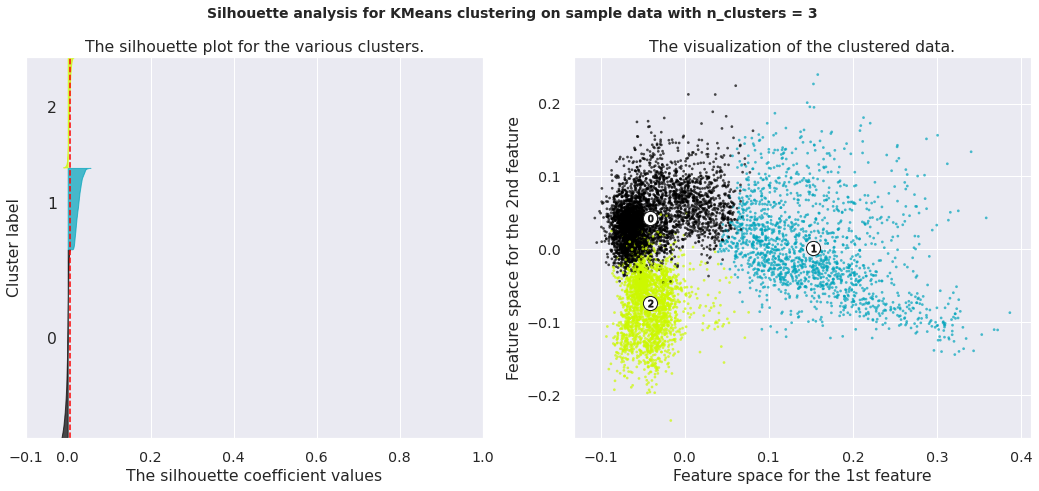

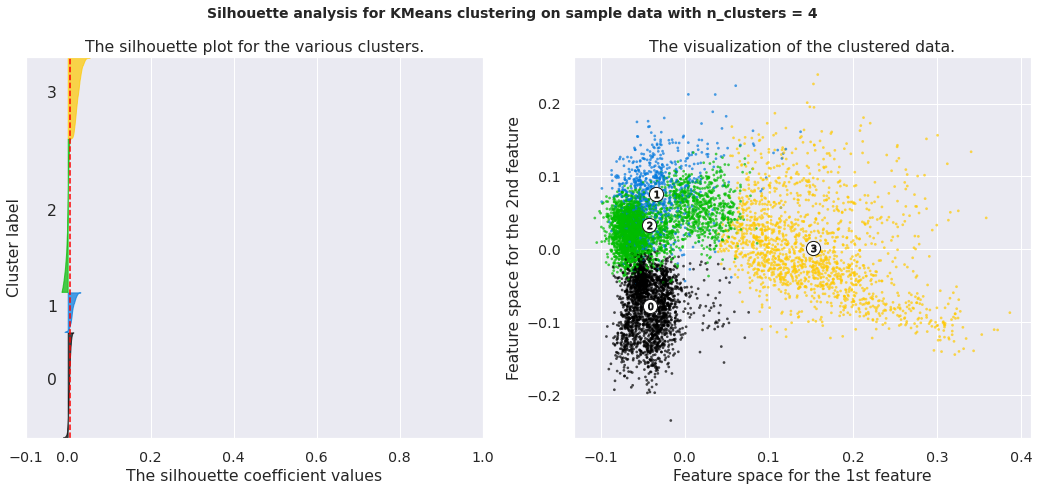

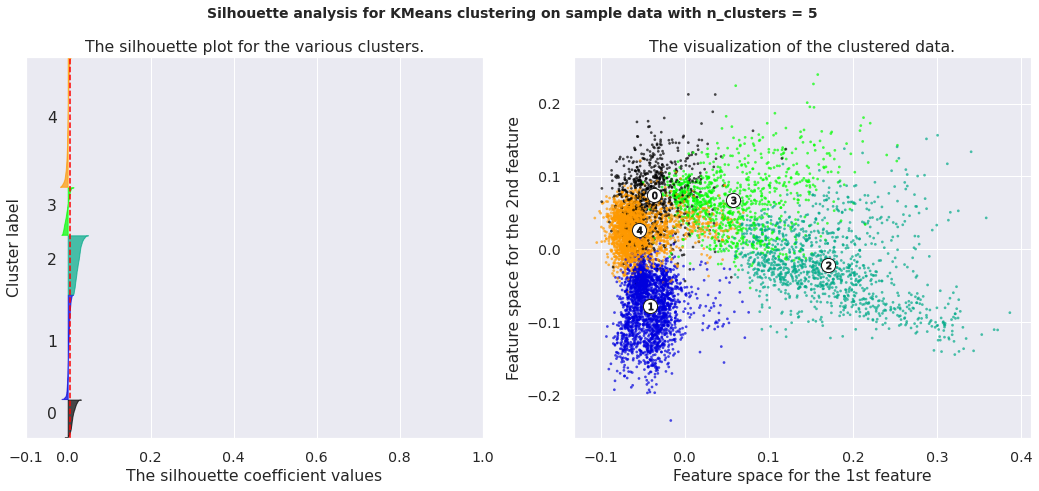

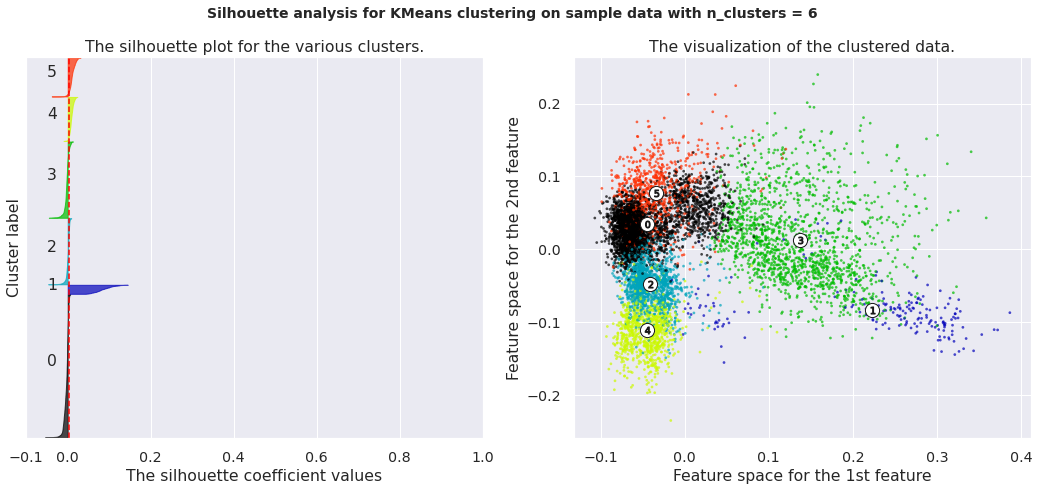

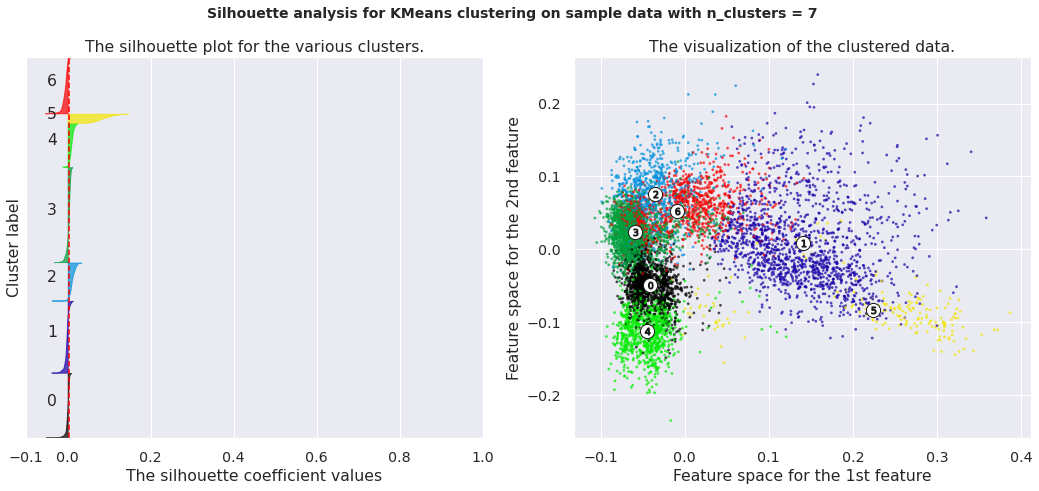

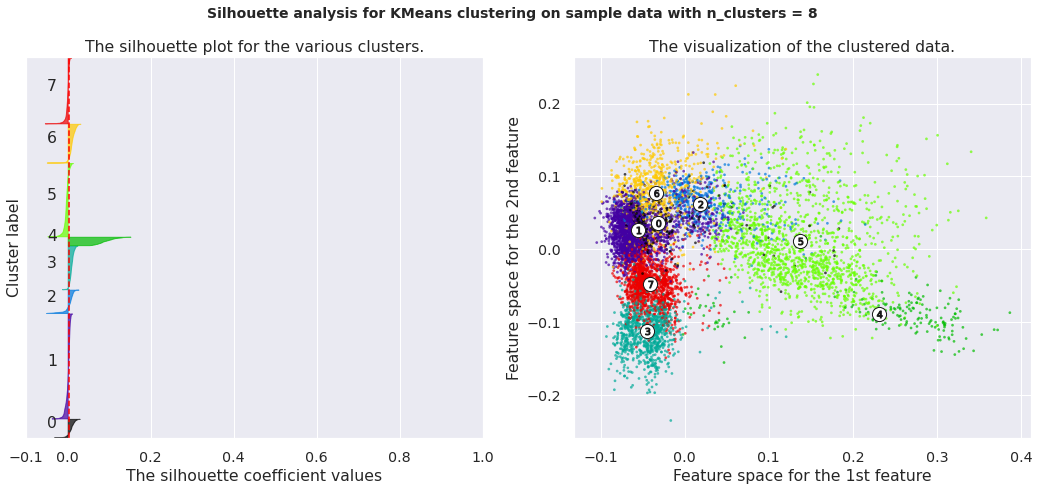

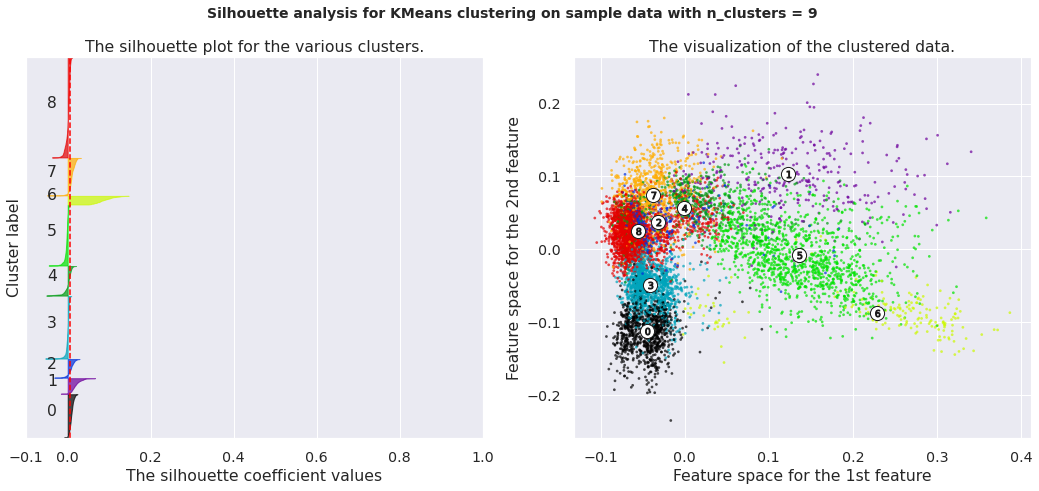

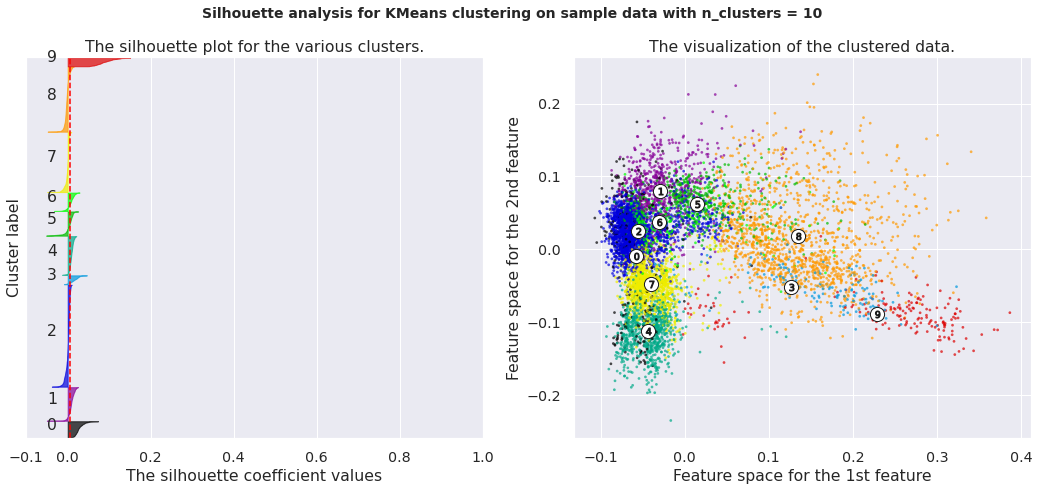

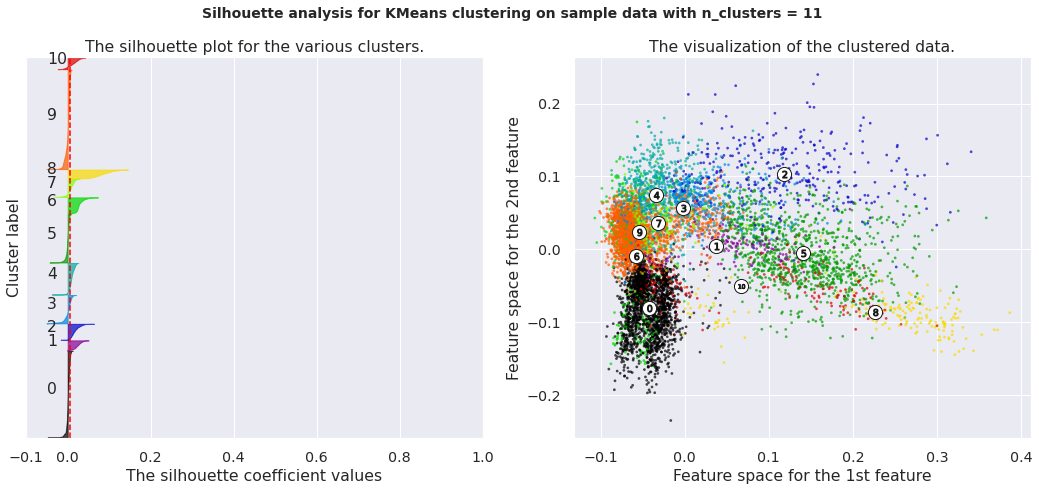

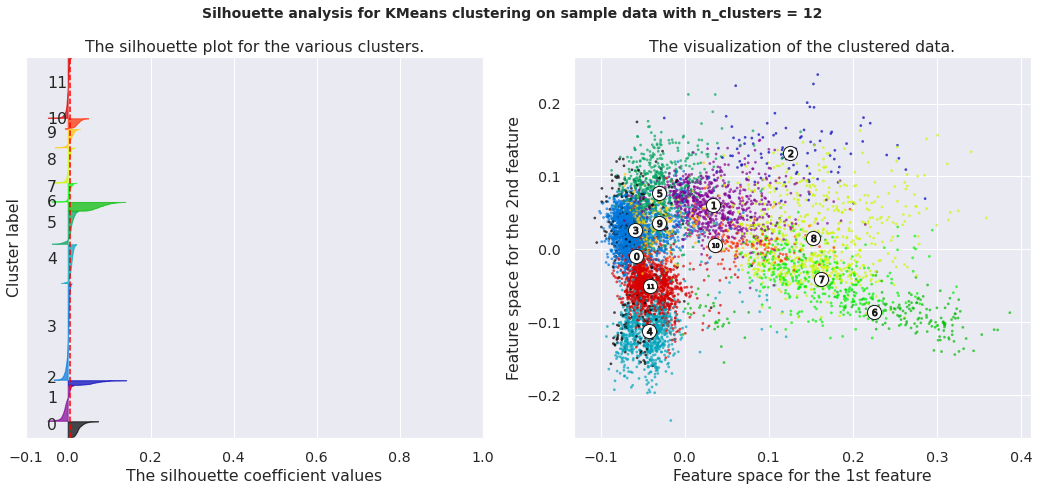

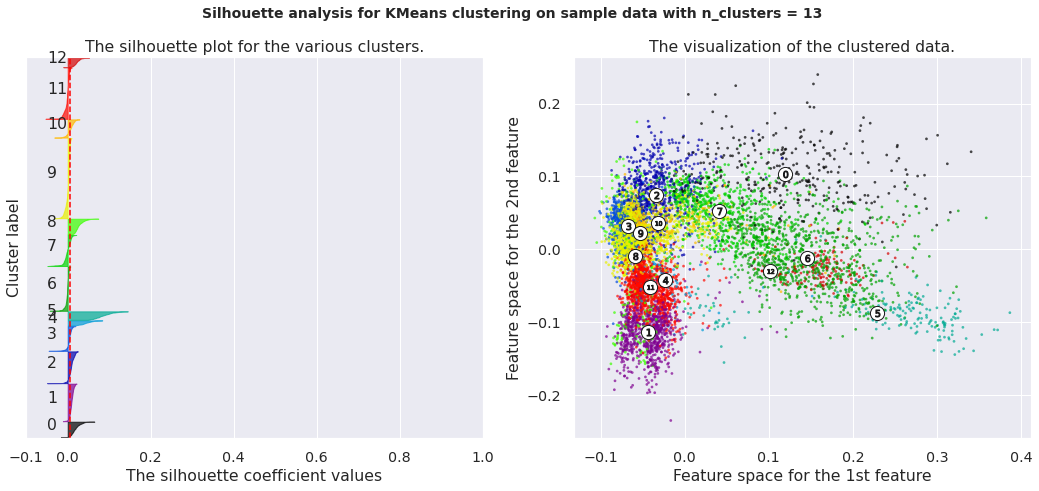

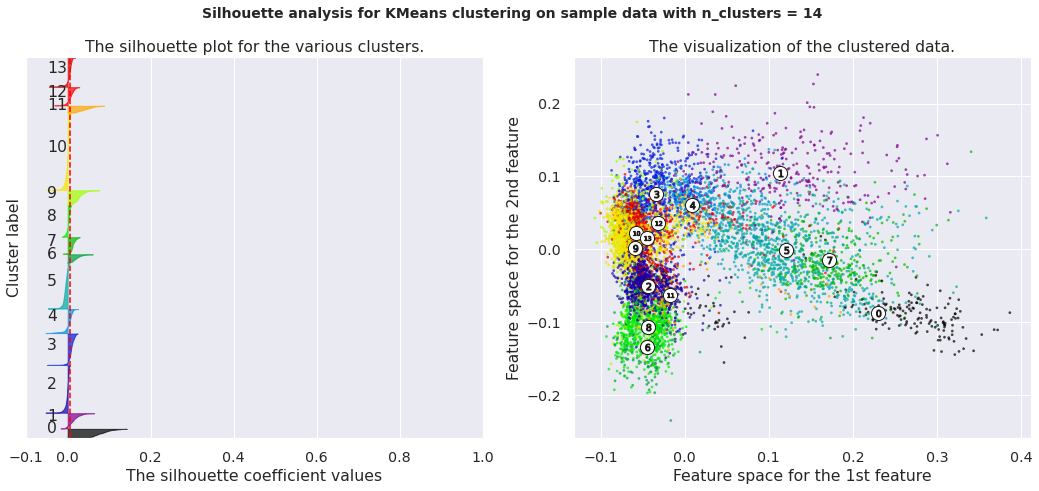

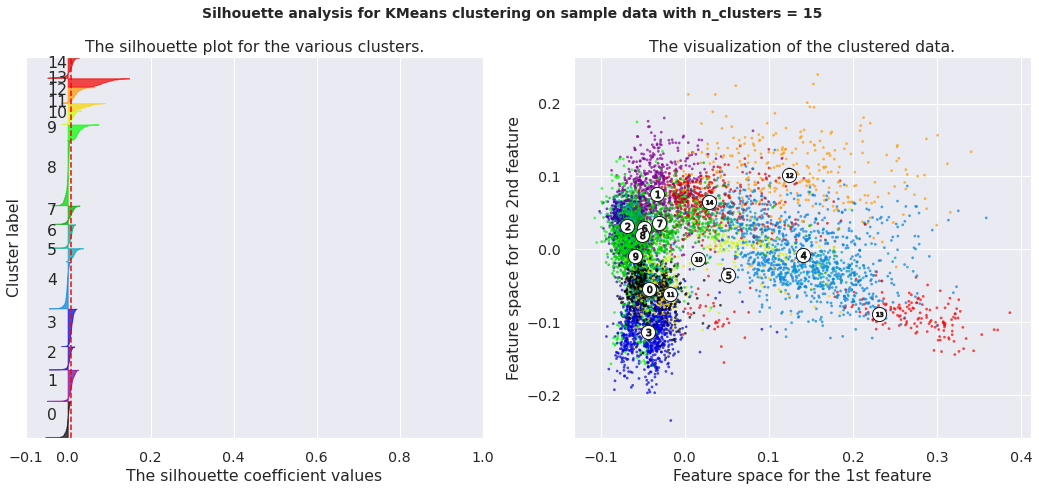

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Conclusion:-**

## **1- Data Overview**

**1- Data Overview**
  * We have **100000** **rows** and **8** **columns** provided in the data.

  * In the dataset we have **5 objects** , **2 floats** and **1 integer** column as **Quantity**.

**2- Checking the null values**
  * We have **277** null values in **Description** column.
  * We also have **25017** null values in **CustomerID** column.

**3- Check Duplicate values in the dataset**

  * We have 200 Duplicate values in the dataset.


---



## **2- Exploratory Data Analysis**

- United Kingdom is the Top country having more than **91.2%** sales as compare to other countries sales.

- MEDIUM STORAGE TOP SELLING JAR is the top selling product.

- **November** month having the most number of sales while **December** month having the least number of sales.

- **17841 Customer ID** having the most Total spending across all customers in a year.

- Netherland and Australia among the top Average Transactions Value (ATV) having more than **100** ATV.

- PAPER CRAFT , LITTLE BIRDIE product having the huge number of returned and refunds


---


## **3- Data pre-processing**

**1- Feature Engineering**
  * For train the model we use description column, listed_in column, rating column, country column, title column, director column, cast column.

**2- We performe Text cleaning as our next step**
  * convert all words in lowercase.

**3- We performe Stemming as our next step**
  * We remove all stopwords.
  * Also use stemming function.

**4- We performe TF-IDF vectorizer**
  * Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

**5- Applying PCA-Principal Component Analysis to reduce dimensions.**
  * We will use 250 components



---


## **3- Applying models**

**1- Find the value of clusters**
  * WE use Elbow method for finding k values.
  * Also use Silhouette Score for best score.
  * Also use Dendogram for finding the value of clusters.
  
**2- Use Agglomerative Clustering**

**3- Use KMeans Clustering**

Here are few clusters with there word cloud graph

